<a href="https://colab.research.google.com/github/apthagowda97/computer_vision_poc/blob/master/classification/notebook/pytorch_transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%shell

wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
tar -xzf flower_photos.tgz

--2020-08-31 17:52:13--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 173.194.216.128, 108.177.11.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   153MB/s    in 1.4s    

2020-08-31 17:52:15 (153 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [82]:
import os
import cv2
import time
import copy
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from torchvision.transforms import *
from torchvision import transforms

In [83]:
image_name = [];flower_name = []
for dir_name in os.listdir('flower_photos'):
  if os.path.isdir(os.path.join('flower_photos',dir_name)):
    names = os.listdir(os.path.join('flower_photos',dir_name))
    image_name.extend(names);flower_name.extend([dir_name]*len(names))

In [84]:
le = LabelEncoder()
flower_df = pd.DataFrame(data={'flower_name':flower_name,'image_name':image_name})
flower_df['image_path'] = flower_df['flower_name']+'/'+flower_df['image_name']
flower_df['target'] = le.fit_transform(flower_df['flower_name'])
classes = le.classes_
print("Target : {}".format(classes))

Target : ['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']


In [85]:
flower_df = flower_df.sample(frac=1,random_state=42).reset_index(drop=True)
flower_df.head()

,flower_name,image_name,image_path,target
0,roses,145862135_ab710de93c_n.jpg,roses/145862135_ab710de93c_n.jpg,2
1,tulips,13910126337_53faf1d214_n.jpg,tulips/13910126337_53faf1d214_n.jpg,4
2,daisy,4286053334_a75541f20b_m.jpg,daisy/4286053334_a75541f20b_m.jpg,0
3,sunflowers,9558627290_353a14ba0b_m.jpg,sunflowers/9558627290_353a14ba0b_m.jpg,3
4,sunflowers,39271782_b4335d09ae_n.jpg,sunflowers/39271782_b4335d09ae_n.jpg,3


In [86]:
def plot_transform(index,transform,repeat=7):
  plt.figure(figsize=(30,10))
  for i in range(1,repeat+1):
    plt.subplot(1,repeat+1,i);plt.axis('off')
    full_image_path = os.path.join('flower_photos',flower_df['image_path'][index])
    image = Image.open(full_image_path)
    image = transform(image)
    plt.imshow(image)
  print(transform)

RandomHorizontalFlip(p=0.5)


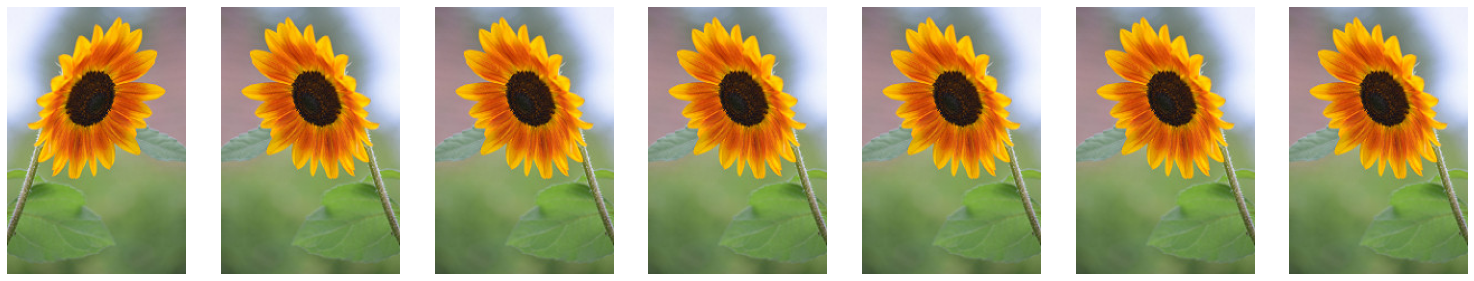

In [87]:
plot_transform(3, RandomHorizontalFlip())